# I. Data Cleaning and Preprocessing
>### 1. Loading the Data
>### 2. Handle Missing Values
>### 3. Identify and Handle Outliers
>### 4. Normalize the Data

<h2><h2>

<h4>Load the Data <h4>
<h4> Display the head and info (Columns) <h4>

In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('weather.csv')

In [67]:
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48721 entries, 0 to 48720
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48721 non-null  object 
 1   location_name                 48721 non-null  object 
 2   latitude                      48721 non-null  float64
 3   longitude                     48721 non-null  float64
 4   timezone                      48721 non-null  object 
 5   last_updated_epoch            48721 non-null  int64  
 6   last_updated                  48721 non-null  object 
 7   temperature_celsius           48721 non-null  float64
 8   temperature_fahrenheit        48721 non-null  float64
 9   condition_text                48721 non-null  object 
 10  wind_mph                      48721 non-null  float64
 11  wind_kph                      48721 non-null  float64
 12  wind_degree                   48721 non-null  int64  
 13  w

<h2> Find Numerical vs. Categorial Columns <h2>

In [51]:
# find outliers, and normalize data.

numeric_columns = data.select_dtypes(include='number').shape[1]

# Count categorical columns
categorical_columns = data.select_dtypes(include='object').shape[1]

print(f'Count of numeric columns: {numeric_columns}')
print(f'Count of categorial columns: {categorical_columns}')
print(f'Shape / dimension of the data: {data.shape}' )

Count of numeric columns: 30
Count of categorial columns: 11
Shape / dimension of the data: (48721, 41)


<h2> Find / Handle Missing Data <h2>

In [26]:
"""  
Handle missing values.

Output is all zeros, which means there are no missing values.

"""

data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

<h2> Find / Handle Outliers <h2>

In [ ]:
# check statistics of data get an overview of the data's potential outliers
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,48721.000000,48721.000000,4.872100e+04,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,...,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000,48721.000000
mean,19.141505,22.205894,1.726705e+09,23.045163,73.482741,8.282962,13.334174,170.965846,1013.746208,29.935316,...,19.278956,516.592458,62.771148,14.032787,10.606635,23.528673,46.246895,1.650295,2.512223,49.776996
std,24.481360,65.788750,6.311845e+06,9.161063,16.489812,9.880716,15.900237,103.192927,7.056104,0.208265,...,17.589102,993.205559,37.808181,25.762102,51.922382,45.736080,140.374834,0.960976,2.472380,34.933034
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721134e+09,18.200000,64.800000,4.000000,6.500000,82.000000,1010.000000,29.830000,...,10.800000,218.300000,37.000000,0.839000,0.700000,4.700000,7.700000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726743e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,310.800000,59.000000,2.960000,2.100000,12.000000,18.685000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.732179e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,...,25.700000,477.300000,83.700000,14.245000,7.900000,26.270000,42.180000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.737541e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\3436296726.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='Set2')
C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\3436296726.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='Set2')
C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\3436296726.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[column], palette='Set2')
C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\3436296726.py:22: FutureWarning: 

Passing `palette` withou

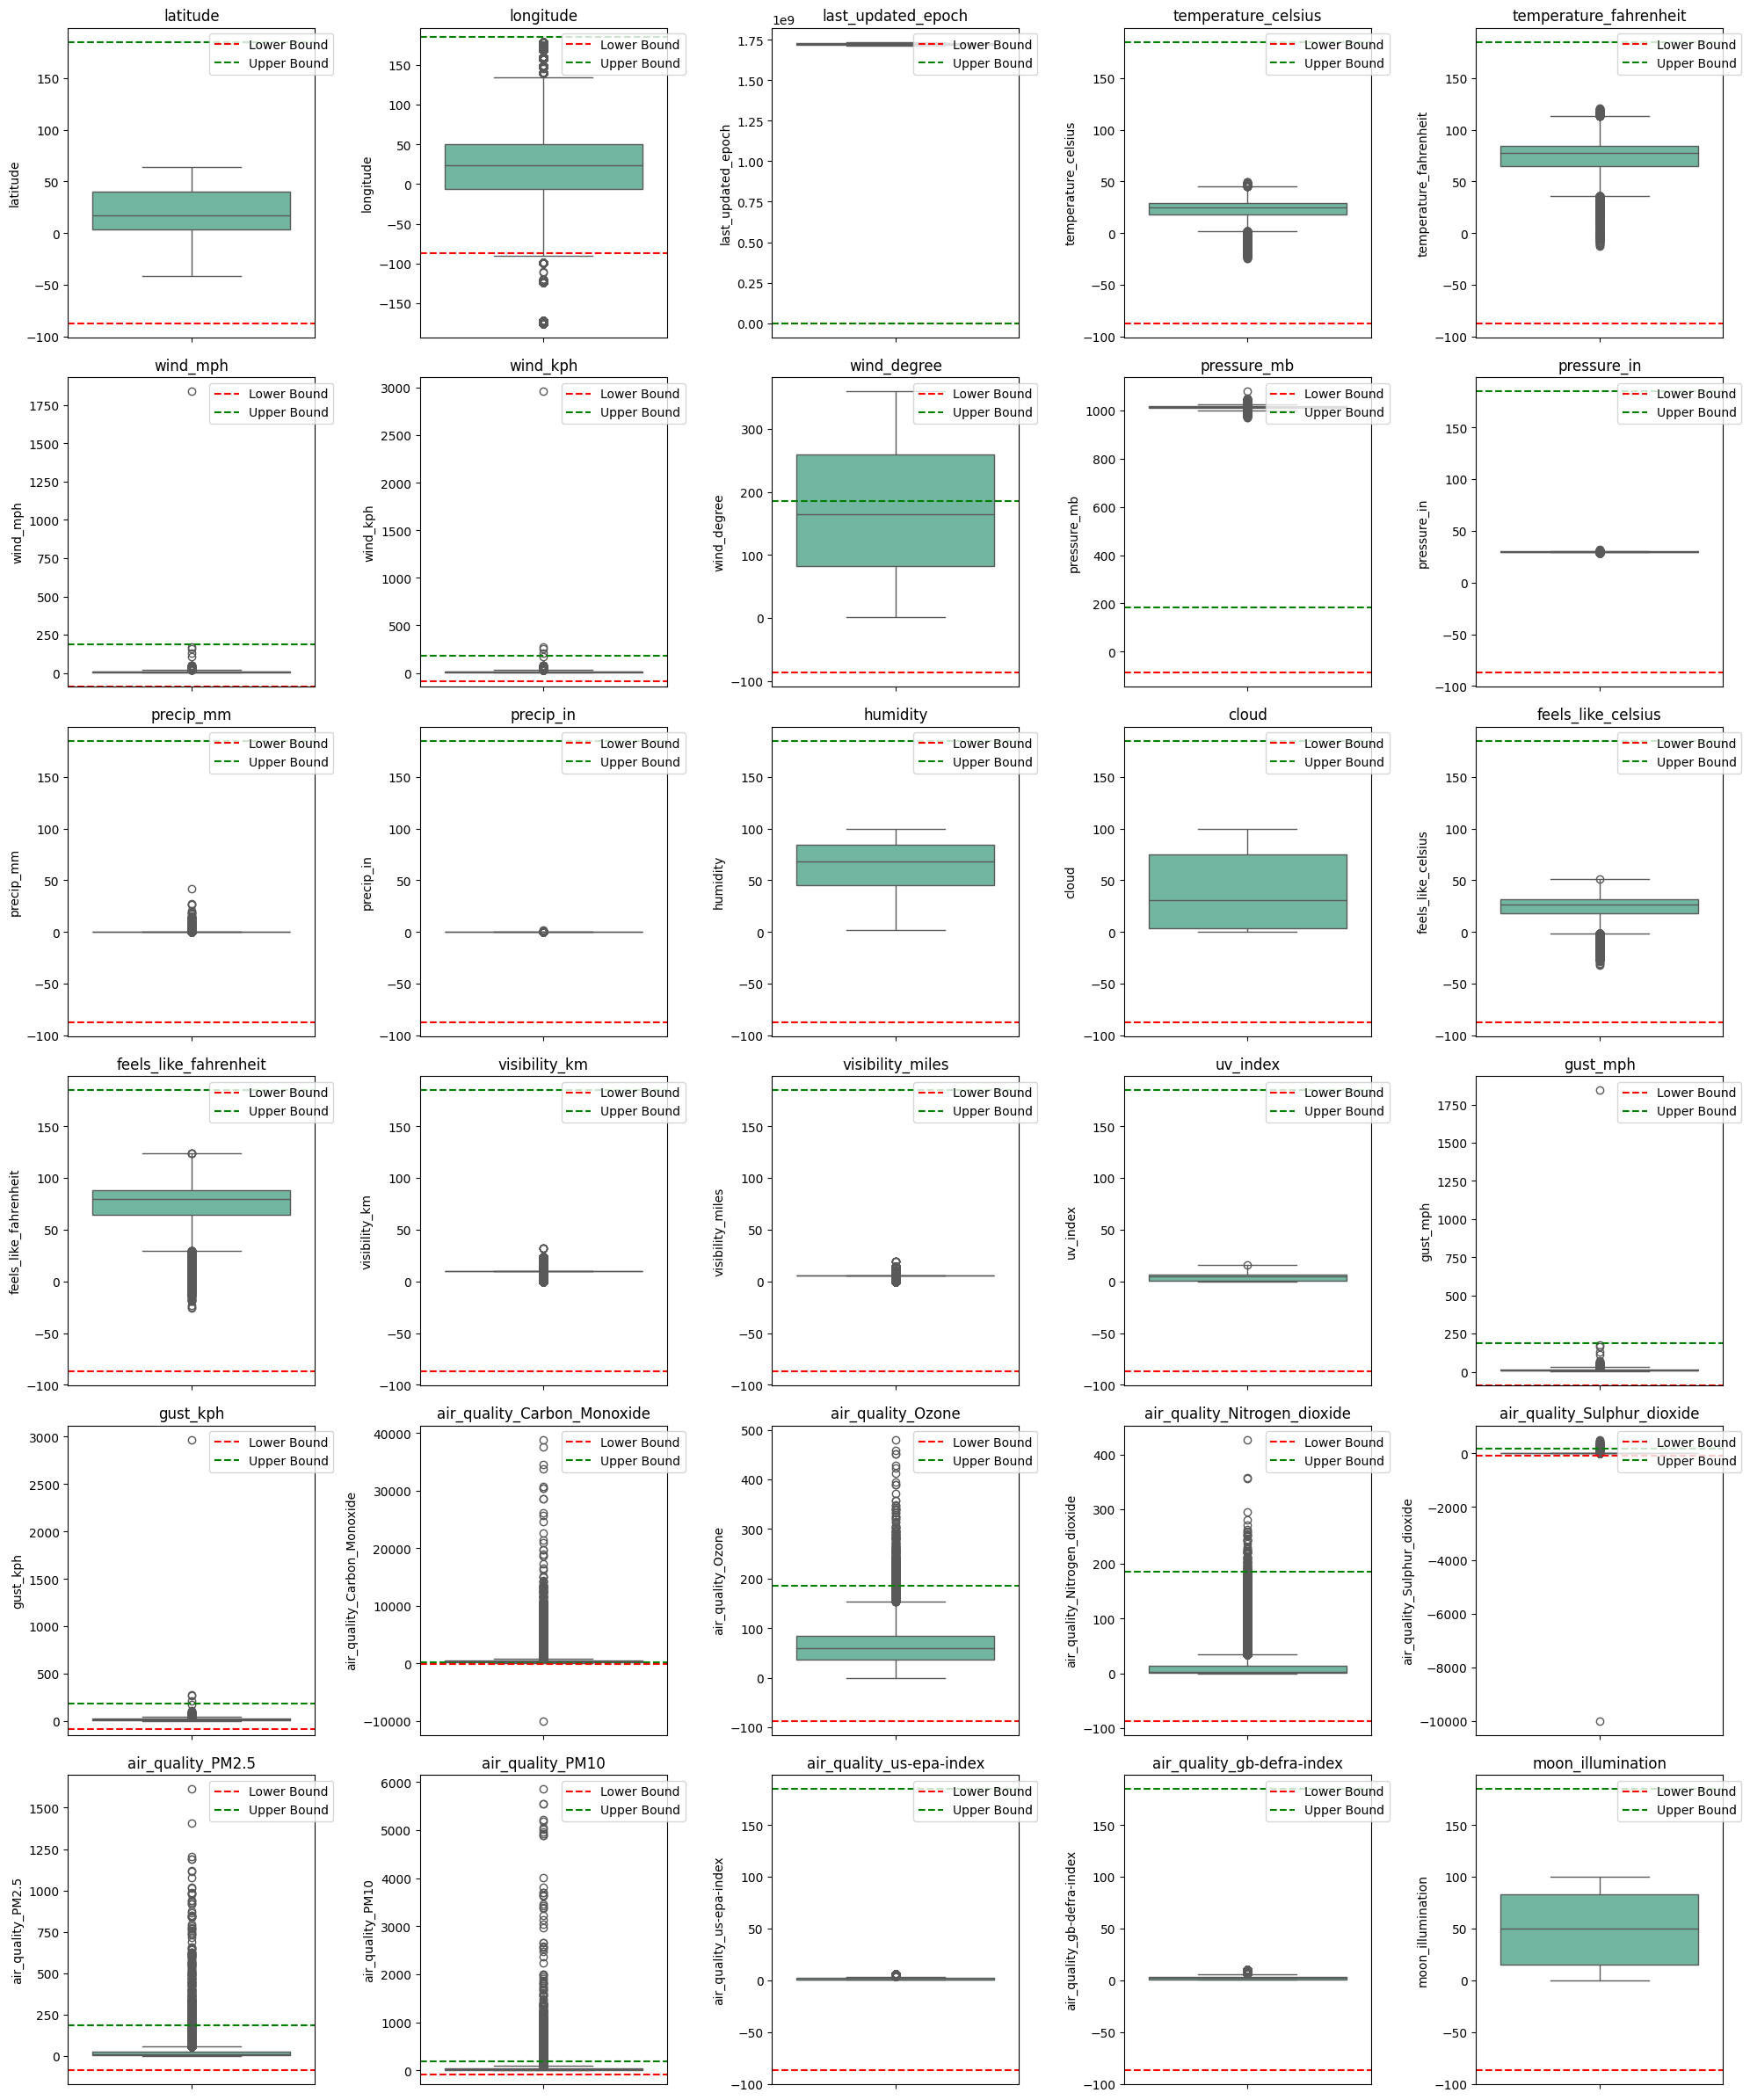

In [58]:
numeric_columns = data.select_dtypes(include=['number']).columns

outliers = {}

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

num_cols = 5
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

# Create boxplots to diplay 
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[column], palette='Set2')
    
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    
    plt.title(column)
    plt.xlabel('')
    
  
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()


## The difference between the boxplot with and without outliers is more visible in the columns pressure_mb and wind_degree

C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\1240918243.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_wo_outliers[column], palette='Set2')
C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\1240918243.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_wo_outliers[column], palette='Set2')
C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\1240918243.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_wo_outliers[column], palette='Set2')
C:\Users\masoh\AppData\Local\Temp\ipykernel_20184\1240918243.py:41: FutureWarni

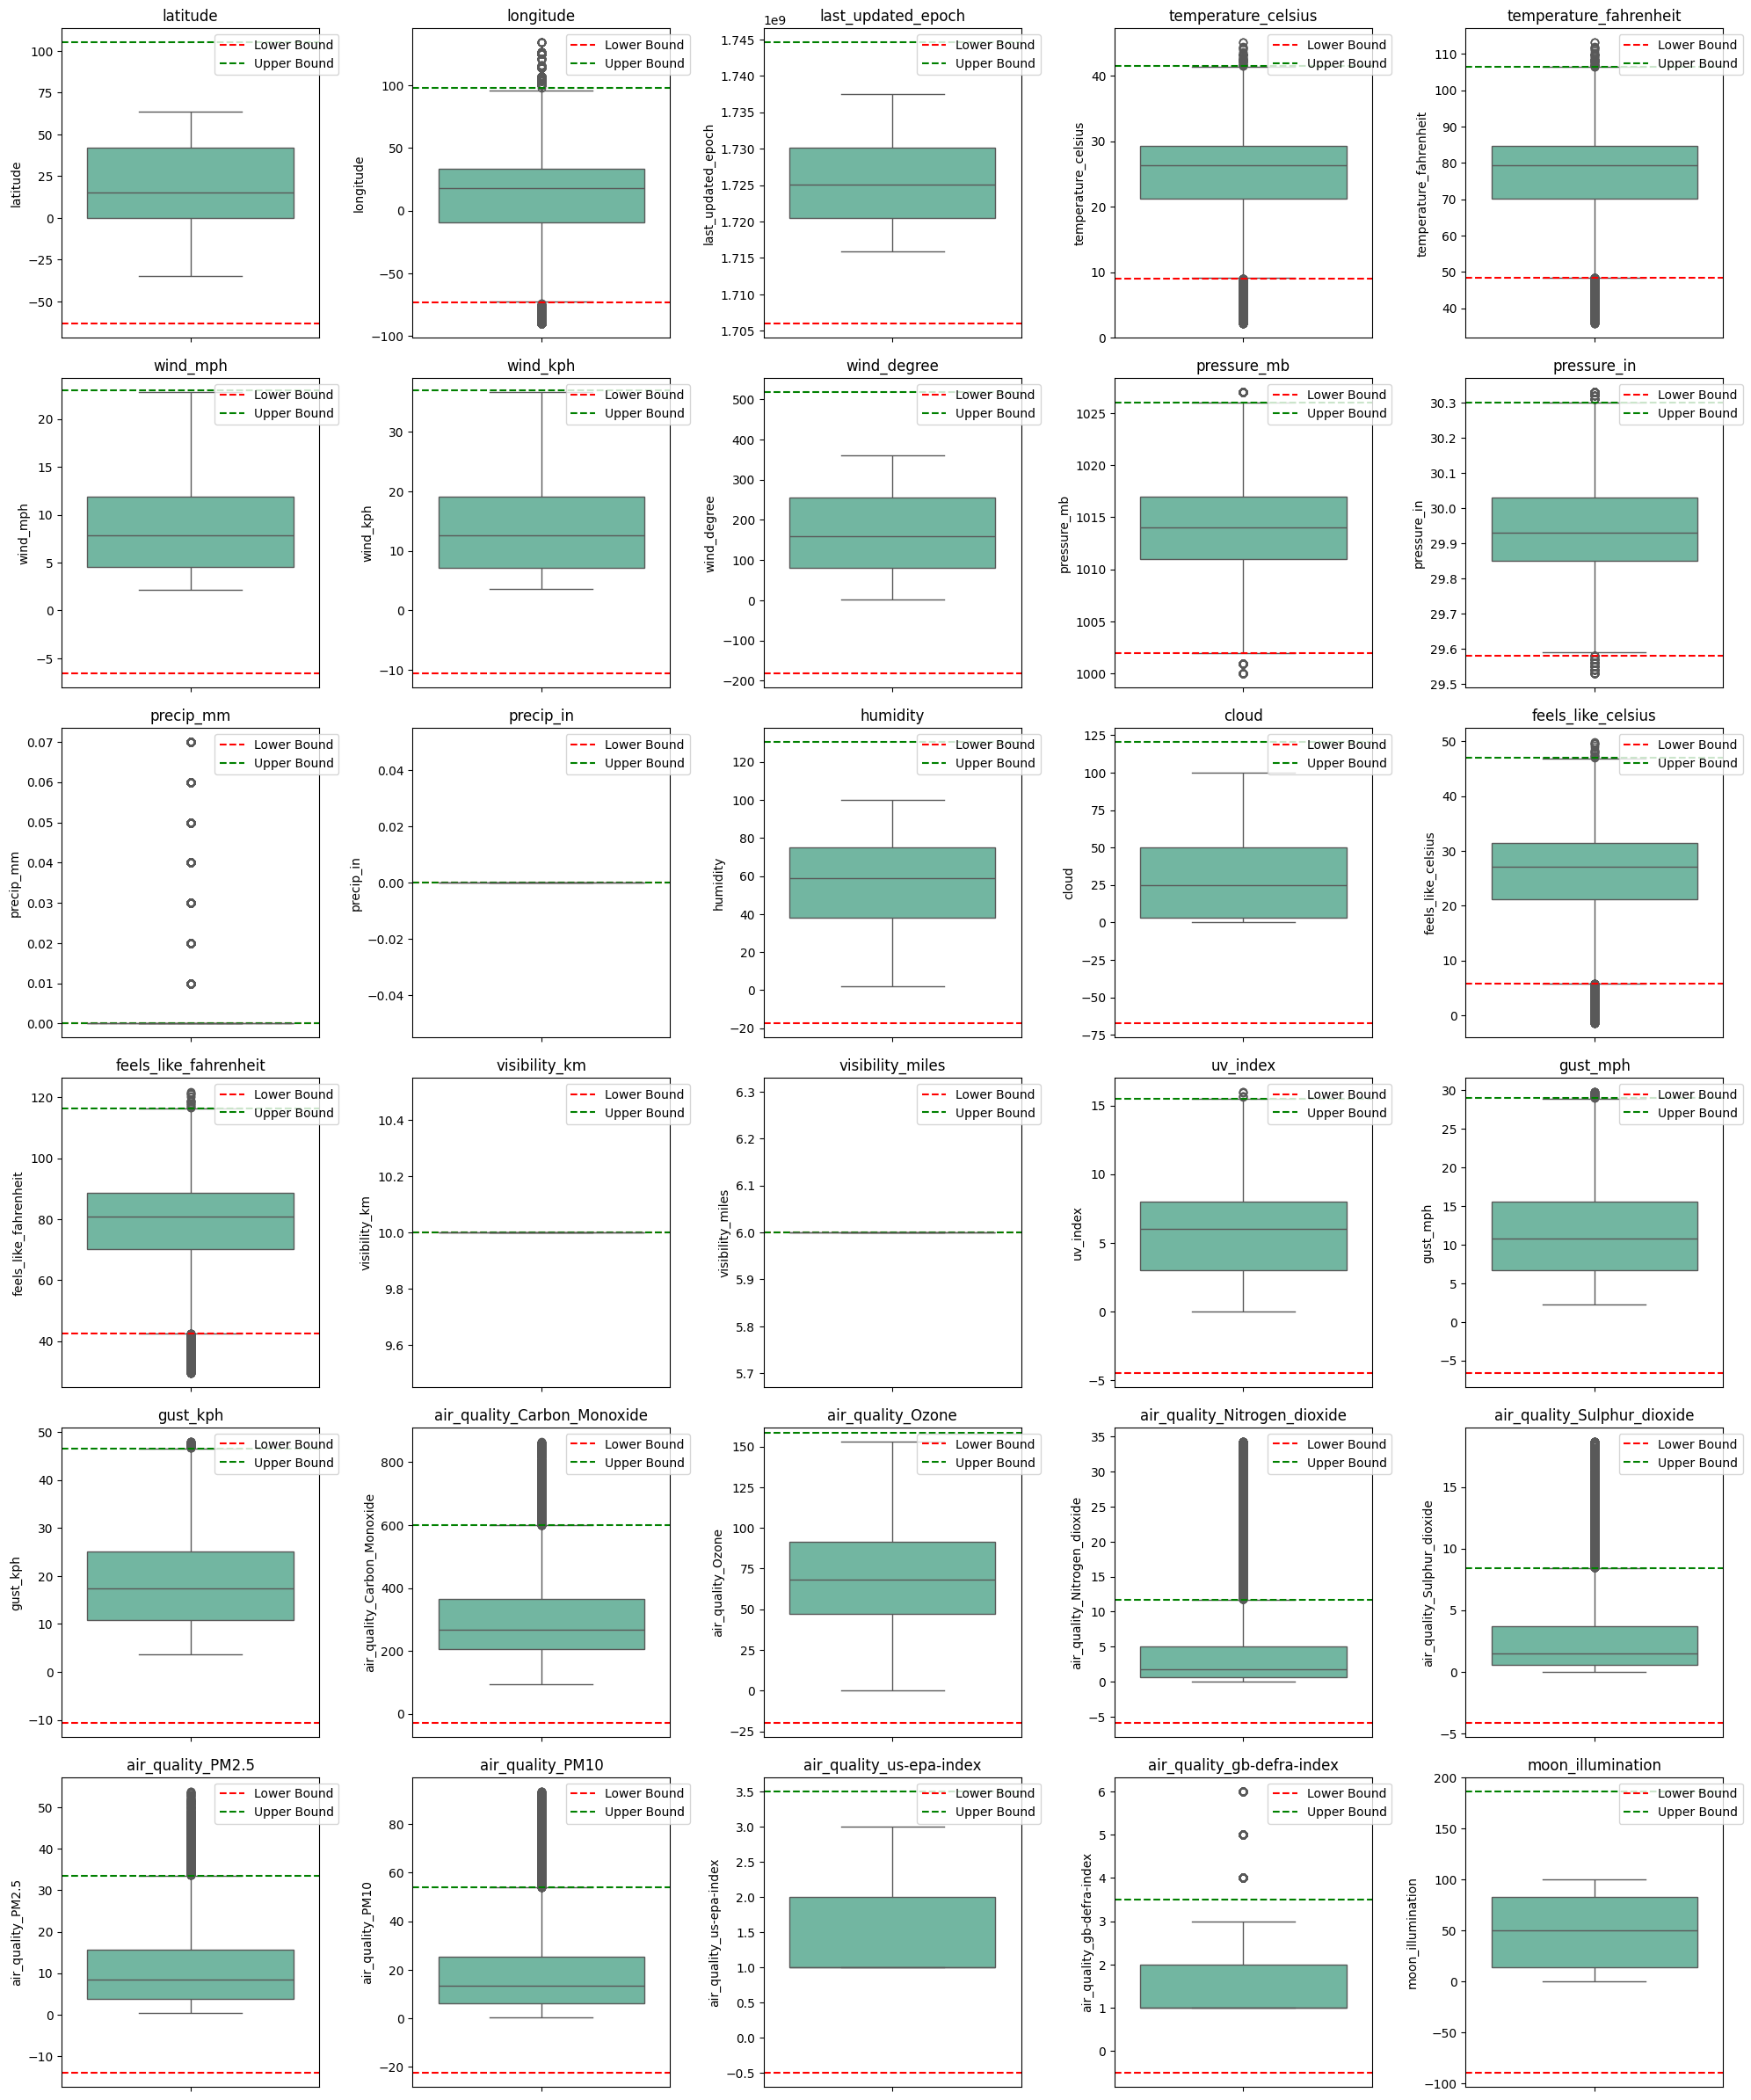

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""   
Now we display the scatter box after removing the outliers

"""


outlier_mask = pd.Series(False, index=data.index)

# Calculate the IQR and identify outliers
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data [column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask |= (data[column] < lower_bound) | (data[column] > upper_bound)

# Create a new DataFrame without outliers
df_wo_outliers = data[~outlier_mask]

# Set up the matplotlib figure
num_cols = 5
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))


for i, column in enumerate(numeric_columns):
    Q1 = df_wo_outliers[column].quantile(0.25)
    Q3 = df_wo_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_wo_outliers[column], palette='Set2')
    
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    
    plt.title(column)
    plt.xlabel('')
    

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

<h2> Normalize the data with a center of 0 and a standard deviation of 1 <h2>

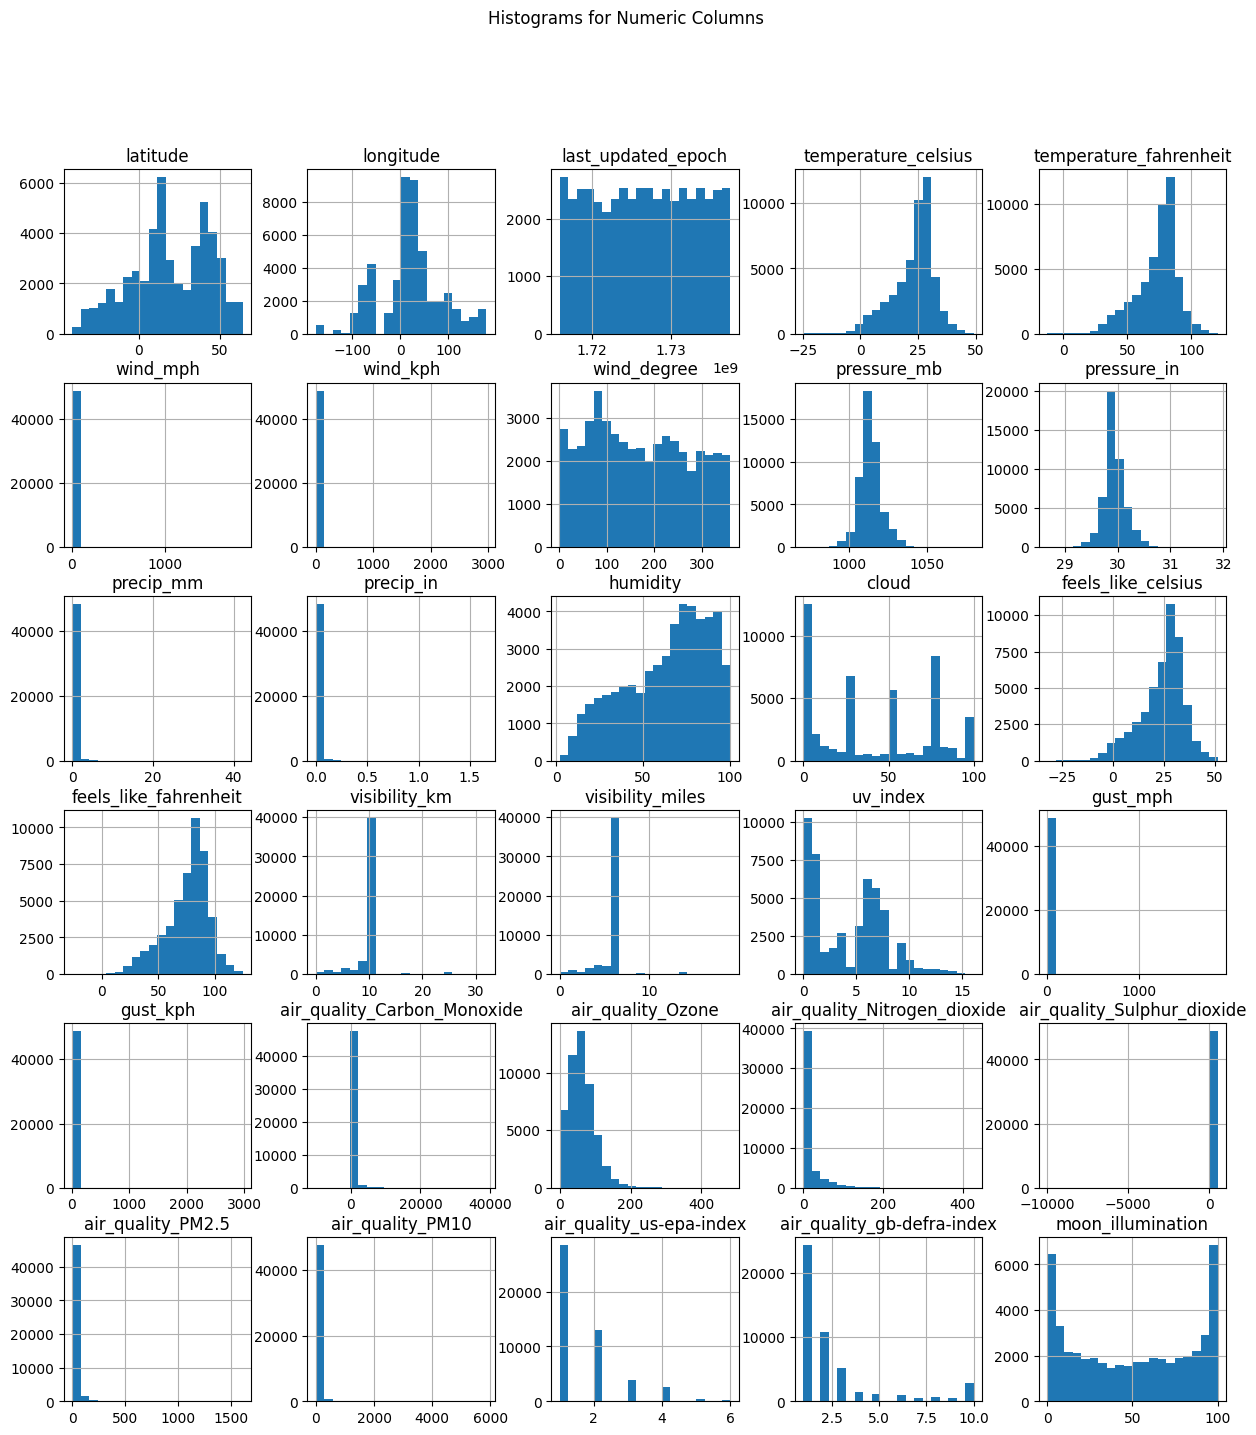

In [69]:
# Use a histogram to view the distribution of the numeric columns

data.select_dtypes(include='number').hist(bins=20, figsize=(15, 16))
plt.suptitle('Histograms for Numeric Columns')
plt.show()

<h2> Most of the Histograms do not follow a Guassian/Normal distribution, therefore, we will use normalization (min-max) <h2>

Normalization Formula:
$x' = (x - min(x)) / (max(x) - min(x))$

<h2> Method 1, Sickitlearn MinMaxScaler() <h2>

In [72]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = data.select_dtypes(include='number').columns

scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(data[numeric_columns])

normalized_data = data.copy()
normalized_data[numeric_columns] = normalized_array

normalized_data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,0.719014,0.689521,Asia/Kabul,0.0,2024-05-16 13:15,0.694595,0.693694,Partly Cloudy,...,0.005090,0.004509,0.0,0.0,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,0.55
1,Albania,Tirana,0.783594,0.550251,Europe/Tirane,0.0,2024-05-16 10:45,0.591892,0.591592,Partly cloudy,...,0.000567,0.000310,0.0,0.0,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,0.55
2,Algeria,Algiers,0.740256,0.502934,Africa/Algiers,0.0,2024-05-16 09:45,0.645946,0.645646,Sunny,...,0.006329,0.003110,0.0,0.0,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,0.55
3,Andorra,Andorra La Vella,0.794689,0.498617,Europe/Andorra,0.0,2024-05-16 10:45,0.420270,0.419670,Light drizzle,...,0.000319,0.000122,0.0,0.0,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,0.55
4,Angola,Luanda,0.307824,0.531657,Africa/Luanda,0.0,2024-05-16 09:45,0.686486,0.686186,Partly cloudy,...,0.113522,0.044746,0.8,1.0,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,0.55


<h2> Method 2, Manually Normalizing the data using min(), Max() <h2>

In [74]:

normalized_data = data.copy()  

# Apply min-max normalization to numeric columns
for column in normalized_data.select_dtypes(include='number').columns:
    col_min = normalized_data[column].min()
    col_max = normalized_data[column].max()
    normalized_data[column] = (normalized_data[column] - col_min) / (col_max - col_min)

# Display the normalized data
normalized_data.head()



,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,0.719014,0.689521,Asia/Kabul,0.0,2024-05-16 13:15,0.694595,0.693694,Partly Cloudy,...,0.005090,0.004509,0.0,0.0,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,0.55
1,Albania,Tirana,0.783594,0.550251,Europe/Tirane,0.0,2024-05-16 10:45,0.591892,0.591592,Partly cloudy,...,0.000567,0.000310,0.0,0.0,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,0.55
2,Algeria,Algiers,0.740256,0.502934,Africa/Algiers,0.0,2024-05-16 09:45,0.645946,0.645646,Sunny,...,0.006329,0.003110,0.0,0.0,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,0.55
3,Andorra,Andorra La Vella,0.794689,0.498617,Europe/Andorra,0.0,2024-05-16 10:45,0.420270,0.419670,Light drizzle,...,0.000319,0.000122,0.0,0.0,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,0.55
4,Angola,Luanda,0.307824,0.531657,Africa/Luanda,0.0,2024-05-16 09:45,0.686486,0.686186,Partly cloudy,...,0.113522,0.044746,0.8,1.0,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,0.55


# II. Exploratory Data Analysis (EDA)
>### 1. Precipitation and Temperature
>### 2. Correlations and heatmap
>### 4. Observations

#### Correlation between temperature and precipitation visible through scatterplot

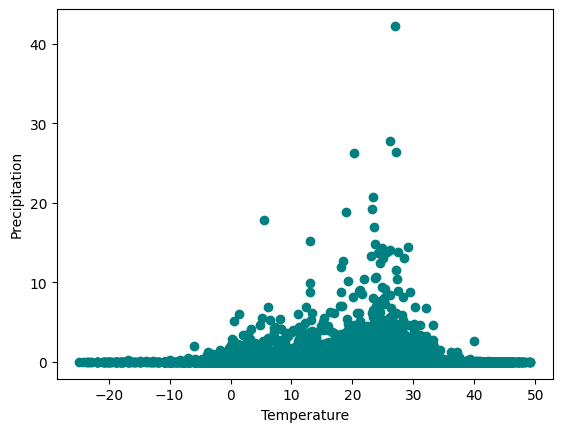

In [137]:
plt.scatter(data['temperature_celsius'], data['precip_mm'], color='teal')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')

plt.show()

In [76]:
corr =data.corr(numeric_only=True) # data frame correlation function
print(corr)

                              latitude  longitude  last_updated_epoch  \
latitude                      1.000000  -0.020725           -0.000208   
longitude                    -0.020725   1.000000            0.004352   
last_updated_epoch           -0.000208   0.004352            1.000000   
temperature_celsius          -0.276374   0.101767           -0.369165   
temperature_fahrenheit       -0.276357   0.101751           -0.369165   
wind_mph                      0.022796   0.020910           -0.044433   
wind_kph                      0.022835   0.020842           -0.044444   
wind_degree                   0.176959   0.056994           -0.062292   
pressure_mb                   0.043112  -0.160288            0.226954   
pressure_in                   0.043339  -0.158501            0.227507   
precip_mm                    -0.037346   0.048382           -0.026329   
precip_in                    -0.036183   0.048591           -0.026207   
humidity                     -0.076501  -0.163569  

#### Heat map and correlation between Features

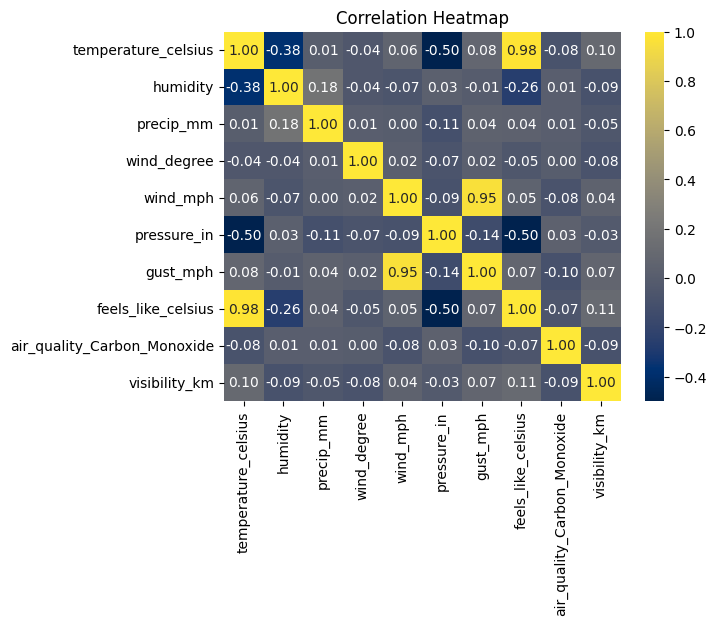

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = corr


columns_to_include = ['temperature_celsius', 'humidity', 'precip_mm', 'wind_degree', 'wind_mph', 'pressure_in', 'gust_mph', 'feels_like_celsius','air_quality_Carbon_Monoxide', 'visibility_km']
filtered_correlation_matrix = correlation_matrix.loc[columns_to_include, columns_to_include]


sns.heatmap(filtered_correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#### Country with the highest precipitation

In [167]:
max_precip_country = data.loc[data['precip_mm'].idxmax(), ['country', 'precip_mm']]
print(max_precip_country)

country      84.00
precip_mm    42.24
Name: 33439, dtype: float64


#### Country with the lowest precipitation

In [138]:
min_precip_country = data.loc[data['precip_mm'].idxmin(), ['country', 'precip_mm']]
print(min_precip_country)

country      Afghanistan
precip_mm            0.0
Name: 0, dtype: object


#### Average humidity

In [175]:
avg_humidity = data['humidity'].mean()
print(f'Average Humidity: {avg_humidity}')

Average Humidity: 63.23521684694485


#### How much does the temperature vary between the last update made?

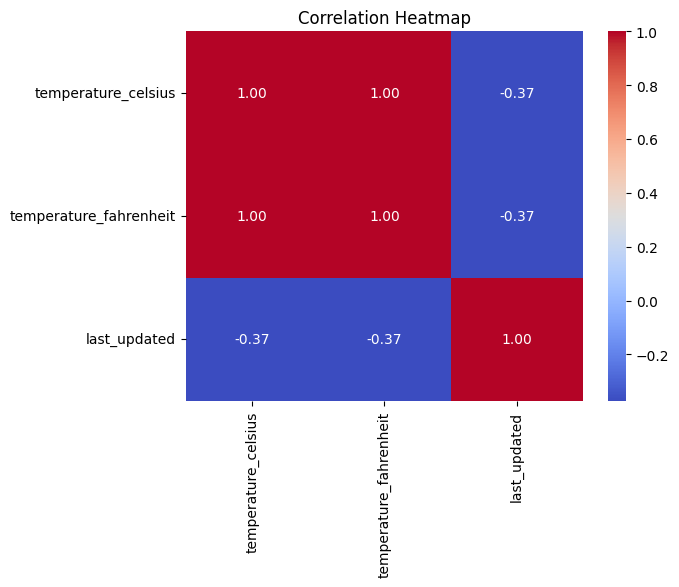

Correlation between last updated time and temperature (celsius and fahrenheit) is: - 0.37


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr1 =data.corr(numeric_only=True)
correlation_matrix = corr1


columns_to_include = ['temperature_celsius', 'temperature_fahrenheit', 'last_updated']
filtered_correlation_matrix = correlation_matrix.loc[columns_to_include, columns_to_include]


sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("Correlation between the last updated time and temperature (celsius and fahrenheit) is: - 0.37")

#### What is the average Wind Speed?
#### How many records according to the dataset have a wind speed higher than average wind speed?
#### And what's the percentage?



In [184]:
avg_wind = data['wind_kph'].mean()

print(f'Average wind speed in km: {avg_wind}')


record_count = data[data['wind_kph'] > avg_wind].shape[0]
print(f'Number of records with a wind speed greater than average wind speed (kph): {record_count}')

print(f'Percentage of records that have a wind speed greater than the average wind speed: {(record_count / data.shape[0]) * 100} %')

Average wind speed in km: 13.334174175406908
Number of records with a wind speed greater than average wind speed (kph): 20026
Percentage of records that have a wind speed greater than the average wind speed: 41.1034256275528 %


# III. Model Building

# ARIMA

In [114]:
data['forecast'] = data['temperature_celsius'].shift(52)  # Assuming monthly data

# split data for testing and training 80/20
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]




In [115]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['temperature_celsius'], order=(1, 1, 1))  # ARIMA(p, d, q)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test))


In [116]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['temperature_celsius'], forecast)
print('MSE:', mse)


MSE: 122.7122608444922


In [119]:
baseline = ((test['temperature_celsius'] - test['temperature_celsius'].mean()) ** 2).mean()
print("Baseline MSE:", baseline)


Baseline MSE: 121.17546559083235


In [117]:
test = test[test['temperature_celsius'] != 0]

mape = np.mean(np.abs((test['temperature_celsius'] - test['forecast']) / test['temperature_celsius'])) * 100

print("Mean Absolute Percentage Error:", mape, "%")


Mean Absolute Percentage Error: 296.92451803634435 %


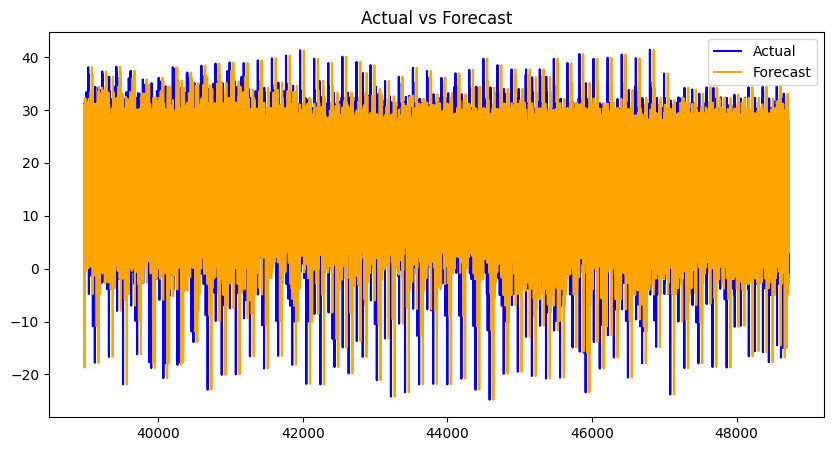

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(test['temperature_celsius'], label='Actual', color='blue')
plt.plot(test['forecast'], label='Forecast', color='orange')
plt.legend()
plt.title('Actual vs Forecast')
plt.show()



## Conclusion for ARIMA Model:
 ### The baseline MSE of 121.18 and the model's MSE of 122.71 are very close, which indicates that the model's performance is nearly identical to predicting the mean (baseline model). This means that the model is not adding much predictive value. 

## Thus, I have tried using XGBoost instead, which is in the section below

# XGBoost

In [120]:
import pandas as pd

# Create lag features for temperature
def create_lag_features(df, lag=12):
    df_lagged = df.copy()
    for i in range(1, lag + 1):
        df_lagged[f'temperature_celsius_lag_{i}'] = df_lagged['temperature_celsius'].shift(i)
    return df_lagged.dropna()  # Drop rows with NaN values due to lagging

# Create lag features with a lag of 12 (for monthly data)
data_lagged = create_lag_features(data, lag=12)


In [121]:
# Train-test split (80% train, 20% test)
train_size = int(len(data_lagged) * 0.8)
train, test = data_lagged[:train_size], data_lagged[train_size:]

# Separate features and target variable
X_train = train.drop(['temperature_celsius'], axis=1)
y_train = train['temperature_celsius']
X_test = test.drop(['temperature_celsius'], axis=1)
y_test = test['temperature_celsius']


In [158]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example: Preprocess the dataset
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.drop('temperature_celsius', axis=1)  # Replace 'target_column' with your actual target column name
y = data['temperature_celsius']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, max_depth=5, reg_alpha=1, reg_lambda=1)

# Fit the model to the training data
model1.fit(X_train, y_train)

# Make predictions
predictions = model1.predict(X_test)

# Evaluate the model
print("Model predictions:", predictions)


Model predictions: [19.999117 28.020544 27.18073  ... 22.812416 27.319492 24.1213  ]


In [159]:
# Make predictions on the test set
y_pred = model1.predict(X_test)

# Display the first few predictions
print("Predictions on testing set:", y_pred[:10])



Predictions on testing set: [19.999117 28.020544 27.18073  22.204546 15.267681 28.017342 28.105162
 21.130268 29.197079 10.429616]


In [160]:
# In order the check if the model is overfitting, I will test it on the training data as well and compare the accuracy with the testing data.
y_predict = model1.predict(X_train)

print("Predictions on training set:", y_predict[:10])

Predictions on training set: [30.30466  34.60675  33.11869  15.284724 20.940031 33.183434 19.990568
 16.309338 24.119408 31.111736]


In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate MSE, RMSE, and MAE
print("Test scores for testing data set: ")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

print(" ")
print("Test scores for training data set: ")
mse1 = mean_squared_error(y_train, y_predict)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_train, y_predict)

print(f'MSE: {mse1}')
print(f'RMSE: {rmse1}')
print(f'MAE: {mae1}')


Test scores for testing data set: 
MSE: 0.03897702586760852
RMSE: 0.19742600099178556
MAE: 0.06001639831106448
 
Test scores for training data set: 
MSE: 0.004766101814151707
RMSE: 0.06903695976903754
MAE: 0.04254048546037757


## Conclusion for XGBoost Model
## The results for MSE, RMSE, and MAE for both testing and training dataset indicate that the model generalizes relatively well, but could still improve
## Which can be done through:
> * cross validation or fine-tuning hyperparameters
> * Further Analyze data for anomalies or outliers
> * Feature engeneeing to combine features and dimensionality reduction.


# IV. Observations and Trends


<h4>

Country with the highest precipitation:
country      84.00
precip_mm    42.24

Country with the lowest precipitation:
country      84.00
precip_mm    42.24

Average humidity: 
63.23521684694485



What is the average wind speed in km: 
13.334174175406908

How many records have a wind speed > average wind speed? What’s the percentage? 
Number of records with a wind speed greater than average wind speed (kph): 20026

Percentage of records that have a wind speed greater than the average wind speed: 41%

<h4>
